In [ ]:
from IPython.display import Audio
# Path to the audio file
audio_file_path = 'drum.wav'

# Load and play the audio
Audio(audio_file_path)

In [ ]:
!pip install pydub

In [ ]:
from IPython.display import Audio
from pydub import AudioSegment
audio_file_path = 'drum.wav'
audio = AudioSegment.from_wav(audio_file_path)
clipped_audio = audio[:2000]
clipped_audio_path = 'clipped_drum.wav'
clipped_audio.export(clipped_audio_path, format='wav')
Audio(clipped_audio_path)

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
audio_path = "drum.wav"   # change if needed
samples, sr = librosa.load(audio_path)

# Create time axis
time = np.linspace(0, len(samples) / sr, len(samples))


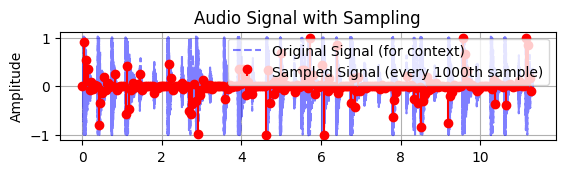

In [ ]:
# 2. Sampled Signal
# Simulate a lower sampling rate for visualization
sampling_factor = 1000

# Take every 100th sample from the original signal
resampled_samples = samples[::sampling_factor]
resampled_time = time[::sampling_factor]

plt.subplot(3, 1, 2)
plt.plot(time, samples, 'b--', alpha=0.5, label='Original Signal (for context)')
plt.stem(resampled_time, resampled_samples,
         linefmt='r-', markerfmt='ro', basefmt=' ',
         label=f'Sampled Signal (every {sampling_factor}th sample)')

plt.title('Audio Signal with Sampling')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()


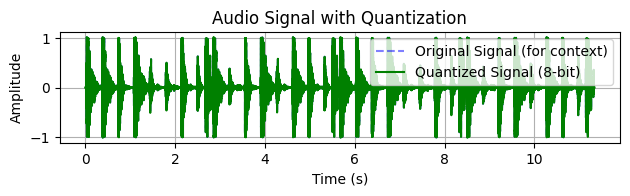

In [ ]:
# 3. Quantized Signal
# Simulate 8-bit quantization for visualization
# Max amplitude is 32767 for 16-bit audio (typical for WAV)
max_amplitude = np.max(np.abs(samples))
num_levels = 2**8  # 8-bit quantization
# Corrected: Cast max_amplitude to float to prevent overflow before multiplication
quantization_step = (2.0 * max_amplitude) / num_levels

quantized_samples = np.round(samples / quantization_step) * quantization_step

plt.subplot(3, 1, 3)
plt.plot(time, samples, 'b--', alpha=0.5, label='Original Signal (for context)')
plt.plot(time, quantized_samples, 'g-', label='Quantized Signal (8-bit)')
plt.title('Audio Signal with Quantization')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()